<a href="https://colab.research.google.com/github/Bart-del/studies-machine-learning/blob/main/Zadanie_10_B_Wysocki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Uczenie maszynowe – zastosowania
### Zajęcia laboratoryjne
# 10. Wprowadzenie do sieci neuronowych

Poniżej znajduje się implementacja prostej sieci neuronowej dla problemu klasyfikacji binarnej na przykładzie losowo wygenerowanego zestawu danych.

W sieciach jednokierunkowych (ang. *feedforward*) wartości neuronów w $i$-tej warstwie są obliczane na podstawie wartości neuronów warstwy $i-1$. Mając daną $n$-warstwową sieć neuronową oraz jej parametry $\Theta^{(1)}, \ldots, \Theta^{(n)} $ oraz $\beta^{(1)}, \ldots, \beta^{(n)}$ liczymy: 
$$a^{(i)} = g^{(i)}\left( a^{(i-1)} \Theta^{(i)} + \beta^{(i)} \right) \; , $$
gdzie $g^{(i)}$ to tzw. **funkcje aktywacji**

## Zadanie 10

### Część podstawowa (4 punkty)

 * Zaimplementuj funkcję `accuracy()` liczącą skuteczność klasyfikacji.
 * Za jej pomocą oblicz i wypisz końcową skuteczność klasyfikatora.
 * Wypisuj również wartość `accuracy` podczas trenowania (przy okazji wypisywania wartości funkcji kosztu).
 * Zbuduj sieci neuronowe dla różnych wielkości warstwy ukrytej (`dim_hid` = 1, 2, 5, 10, 25). Porównaj skuteczność tych modeli.

### Część zaawansowana (3 punkty)

Zastosuj poniższą implementację sieci neuronowej do klasyfikacji binarnej zbioru wygenerowanego za pomocą wybranej funkcji [sklearn.datasets](http://scikit-learn.org/stable/modules/classes.html#samples-generator). Ustal rozmiary warstw wejściowej ($n \gt 2$) i ukrytej, dobierz odpowiednie parametry sieci (parametr $\alpha$, liczba epok, wielkość warstwy ukrytej). Podaj skuteczność klasyfikacji.

In [16]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt


def generate_data():
    # Keep results deterministic
    np.random.seed(1234)
    X, y = datasets.make_moons(200, noise=0.25)
    # X, y = datasets.make_classification(200, 2, 2, 0)
    return X, y

def visualize(X, y, model=None):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    if model:
        Z = predict(model, np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.viridis)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.viridis)
    plt.show()

def initialize_model(dim_in=2, dim_hid=3, dim_out=2):
    # Keep results deterministic
    np.random.seed(1234)
    W1 = np.random.randn(dim_in, dim_hid) / np.sqrt(dim_in)
    b1 = np.zeros((1, dim_hid))
    W2 = np.random.randn(dim_hid, dim_out) / np.sqrt(dim_hid)
    b2 = np.zeros((1, dim_out))
    return W1, b1, W2, b2

def softmax(X):
    e = np.exp(X)
    return e / np.sum(e, axis=1, keepdims=True)

def predict(model, X):
    W1, b1, W2, b2 = model
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    probs = softmax(z2)
    return np.argmax(probs, axis=1)

def calculate_cost(model, X, y):
    W1, b1, W2, b2 = model
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    probs = softmax(z2)
    preds = probs[:, 1]
    return -1. / len(y) * np.sum(
        np.multiply(y, np.log(preds)) + np.multiply(1 - y, np.log(1 - preds)),
        axis=0)

def accuracy(model, X, y):
    predicted = predict(model,X)
    correct = 0
    for i in range(len(y)):
      if y[i] == predicted[i]:
        correct += 1
    return correct / float(len(y)) * 100.0

def train(model, X, y, alpha=0.01, epochs=10000, debug=False):
    W1, b1, W2, b2 = model
    m = len(X)

    for i in range(epochs):
        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        probs = softmax(z2)

        # Backpropagation
        delta3 = probs
        delta3[range(m), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Parameter update
        W1 -= alpha * dW1
        b1 -= alpha * db1
        W2 -= alpha * dW2
        b2 -= alpha * db2

        # Print loss
        if debug and i % 1000 == 0:
            model = (W1, b1, W2, b2)
            print("Cost after iteration {}: {:.4f}".format(i, calculate_cost(
                model, X, y)))
            print("Accuracy after iteration {}: {:.4f}".format(i, accuracy(
                model, X, y)))

    return W1, b1, W2, b2

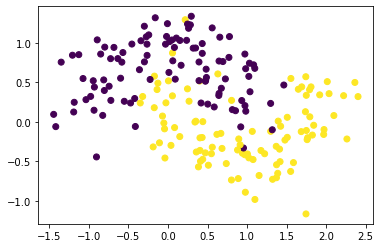

In [13]:
X, y = generate_data()
visualize(X, y)

Cost after iteration 0: 0.6739
Accuracy after iteration 0: 55.5000
Cost after iteration 1000: 0.3618
Accuracy after iteration 1000: 86.0000
Cost after iteration 2000: 0.3618
Accuracy after iteration 2000: 86.0000
Cost after iteration 3000: 0.3618
Accuracy after iteration 3000: 86.0000
Cost after iteration 4000: 0.3618
Accuracy after iteration 4000: 86.0000
Cost after iteration 5000: 0.3618
Accuracy after iteration 5000: 86.0000
Cost after iteration 6000: 0.3618
Accuracy after iteration 6000: 86.0000
Cost after iteration 7000: 0.3618
Accuracy after iteration 7000: 86.0000
Cost after iteration 8000: 0.3618
Accuracy after iteration 8000: 86.0000
Cost after iteration 9000: 0.3618
Accuracy after iteration 9000: 86.0000


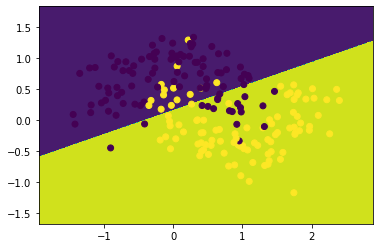

In [20]:
model = train(initialize_model(dim_hid=1), X, y, debug=True)
visualize(X, y, model)

Cost after iteration 0: 0.6024
Accuracy after iteration 0: 67.5000
Cost after iteration 1000: 0.3164
Accuracy after iteration 1000: 87.0000
Cost after iteration 2000: 0.2828
Accuracy after iteration 2000: 88.5000
Cost after iteration 3000: 0.5116
Accuracy after iteration 3000: 80.0000
Cost after iteration 4000: 0.2575
Accuracy after iteration 4000: 90.0000
Cost after iteration 5000: 0.3218
Accuracy after iteration 5000: 87.0000
Cost after iteration 6000: 0.3075
Accuracy after iteration 6000: 87.5000
Cost after iteration 7000: 0.3876
Accuracy after iteration 7000: 83.0000
Cost after iteration 8000: 0.4404
Accuracy after iteration 8000: 79.5000
Cost after iteration 9000: 0.3373
Accuracy after iteration 9000: 86.0000


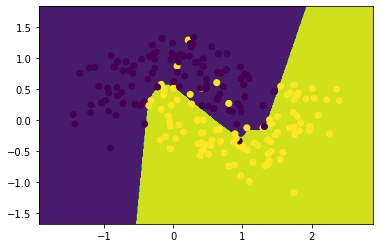

In [18]:
model2 = train(initialize_model(dim_hid=2), X, y, debug=True)
visualize(X, y, model)

Cost after iteration 0: 0.4692
Accuracy after iteration 0: 81.5000
Cost after iteration 1000: 0.1527
Accuracy after iteration 1000: 95.0000
Cost after iteration 2000: 0.1494
Accuracy after iteration 2000: 94.5000
Cost after iteration 3000: 0.1478
Accuracy after iteration 3000: 94.0000
Cost after iteration 4000: 0.1458
Accuracy after iteration 4000: 94.0000
Cost after iteration 5000: 0.1444
Accuracy after iteration 5000: 95.0000
Cost after iteration 6000: 0.1433
Accuracy after iteration 6000: 95.0000
Cost after iteration 7000: 0.1423
Accuracy after iteration 7000: 95.5000
Cost after iteration 8000: 0.1415
Accuracy after iteration 8000: 95.5000
Cost after iteration 9000: 0.1407
Accuracy after iteration 9000: 95.5000


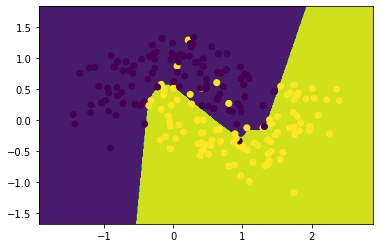

In [19]:
model3 = train(initialize_model(dim_hid=5), X, y, debug=True)
visualize(X, y, model)

Cost after iteration 0: 0.5594
Accuracy after iteration 0: 75.5000
Cost after iteration 1000: 0.1528
Accuracy after iteration 1000: 95.5000
Cost after iteration 2000: 0.1469
Accuracy after iteration 2000: 94.0000
Cost after iteration 3000: 0.1422
Accuracy after iteration 3000: 94.5000
Cost after iteration 4000: 0.1368
Accuracy after iteration 4000: 95.0000
Cost after iteration 5000: 0.1210
Accuracy after iteration 5000: 96.0000
Cost after iteration 6000: 0.1072
Accuracy after iteration 6000: 97.0000
Cost after iteration 7000: 0.1008
Accuracy after iteration 7000: 96.0000
Cost after iteration 8000: 0.0969
Accuracy after iteration 8000: 96.0000
Cost after iteration 9000: 0.0941
Accuracy after iteration 9000: 96.0000


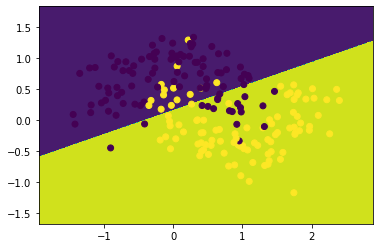

In [21]:
model4 = train(initialize_model(dim_hid=10), X, y, debug=True)
visualize(X, y, model)

Cost after iteration 0: 0.6218
Accuracy after iteration 0: 80.5000
Cost after iteration 1000: 0.1976
Accuracy after iteration 1000: 92.0000
Cost after iteration 2000: 0.1706
Accuracy after iteration 2000: 93.5000
Cost after iteration 3000: 0.1619
Accuracy after iteration 3000: 94.5000
Cost after iteration 4000: 0.1537
Accuracy after iteration 4000: 94.5000
Cost after iteration 5000: 0.1480
Accuracy after iteration 5000: 94.5000
Cost after iteration 6000: 0.1392
Accuracy after iteration 6000: 95.0000
Cost after iteration 7000: 0.1287
Accuracy after iteration 7000: 95.0000
Cost after iteration 8000: 0.1214
Accuracy after iteration 8000: 95.0000
Cost after iteration 9000: 0.1137
Accuracy after iteration 9000: 95.5000


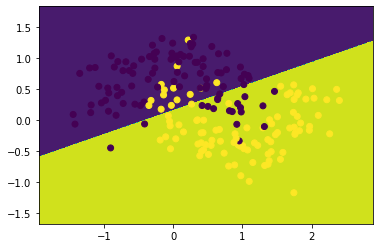

In [22]:
model5 = train(initialize_model(dim_hid=25), X, y, debug=True)
visualize(X, y, model)

In [25]:
accuracy(model,X,y)

84.0

In [23]:
accuracy(model2,X,y)

87.0

In [24]:
accuracy(model3,X,y)

94.5

In [26]:
accuracy(model4,X,y)

96.0

In [27]:
accuracy(model5,X,y)

96.0